# **Lab 8: Logistic Regression**
---

### **Description**

In today's lab, we will review all algorithms we have seen so far. We will see how to implement and evaluate logistic regression models.

<br>

### **Structure**

**Part 1**: [Breast Cancer Dataset Revisited](#p1)
>
> **Part 1.1**: [Implementing Logistic Regression](#p1.1)
>
> **Part 1.2**: [Exploring This Model Further](#p1.2)

**Part 2**: [Digits Dataset](#p2)

**Part 3**: [[OPTIONAL] Homework Practice](#p3)
>
> **Part 3.1**: [College Admissions Dataset](#p3.1)
>
> **Part 3.2**: [Water Quality Dataset](#p3.2)
>
> **Part 3.3**: [Zoo Animal Dataset Revisited](#p3.3)


<br>

### **Learning Objectives**

By the end of this lab, you will:
* Recognize how to implement and evaluate Logistic Regression models in sklearn for binary and multi-class classification.

* Recognize how to interpret ROC curves.

<br>

### **Resources**

* [Linear Regression with sklearn](https://docs.google.com/document/d/1uc4fq5cjOoT1ohol9SR0020ThksWKFjMMnXsvXIPIWE/edit?usp=sharing)

* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1775XrkO8W5_cxIkd_gkUXOu1dt8xDtNWPZSixMGBKIw/edit?usp=sharing)

* [Logistic Regression with sklearn](https://docs.google.com/document/d/1pk2NoGXUu1-muENgZZmWXkbQhBk2eoBql5ya1BhTC1I/edit?usp=sharing)



<br>

**Run the code below before continuing.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *
from sklearn.datasets import *

<a name="p1"></a>

---
## **Part 1: Breast Cancer Dataset Revisited**
---
#### **About the Dataset**
We've already used the Breast Cancer dataset to create a KNN model for classification; now it's time to create a logistic regression model using it. This dataset contains mammography exam results and whether or not cancer was detected.

The features are as follows:
* `radius`
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variations in radius lengths
* `compactness`: perimeter^2 / area - 1
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1

Note: There is data recorded for the mean, standard error, and worst (or largest) for each feature, resulting in 30 total features.
<br>

#### **Your Task**
Using the Breast Cancer dataset, we will do the following:
* Create a logistic regression model in order to classify breast cancer tumors as malignant (0) or benign (1).

<a name="p1.1"></a>

---

### **Part 1.1: Implementing Logistic Regression**

---

#### **Step #1: Load the data**

Use the following code to load the breast cancer dataset.

In [ ]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### **Step #2: Decide independent and dependent variables**

We will be using all features except `target` as our independent variables for predicting `target`.

In [ ]:
# COMPLETE THIS CODE

#### **Step #3: Split the data into train and test sets**

In [ ]:
# COMPLETE THIS CODE

#### **Step #4: Import the Logistic Regression algorithm**

In [ ]:
# COMPLETE THIS CODE

#### **Step #5: Initialize the model**


In [ ]:
# COMPLETE THIS CODE

#### **Step #6: Fit your model and make predictions for the test data**


In [ ]:
# COMPLETE THIS CODE

y_pred = # COMPLETE THIS CODE

y_pred_proba = # COMPLETE THIS CODE

y_pred_binary = # COMPLETE THIS CODE

#### **Step #7: Evaluate the model**

Evaluate your model using a confusion matrix.


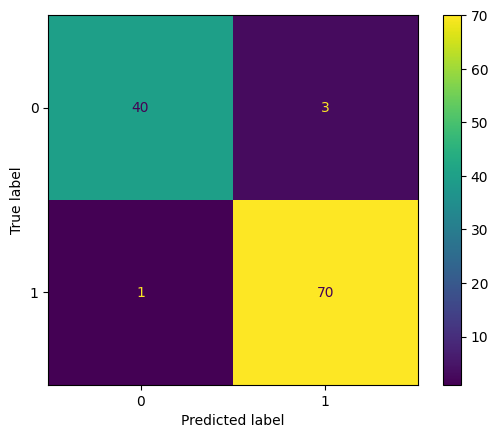

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

<a name="p1.2"></a>

---

### **Part 1.2: Exploring This Model Further**

---

#### **Problem #1.2.1**

Let's further understand this model's performance using a classification report.


In [ ]:
report = # COMPLETE THIS CODE
print(report)

#### **Problem #1.2.2**

Complete the code below to train a 5NN model on this data and produce its classification report for comparison.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = # COMPLETE THIS CODE
# COMPLETE THIS CODE
knn_pred = # COMPLETE THIS CODE

report = # COMPLETE THIS CODE
print(report)

#### **Problem #1.2.3**

**Run the code below to plot the ROC curve for the logistic regression model.**

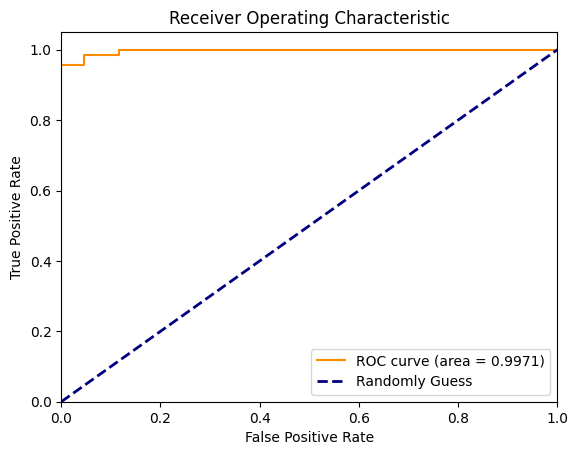

In [ ]:
# Plot Sensitivity (TPR) vs 1-Specificity (FPR
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Randomly Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### **Reflection questions**
Based on the results in Parts 1.1 and 1.2, answer the following questions:

1. What do the predicted probabilities represent in this context?
2. How is the threshold of 0.5 used to convert predicted probabilities into binary predictions?
3. What does precision mean for the Benign class in this model?
4. Would you trust this model?

<a name="p2"></a>

---
## **Part 2: Digits Dataset**
---

#### **About the Dataset**
Computer Vision is a growing field in AI. The Digits Dataset consists of 1,797 grayscale images of handwritten digits ranging from 0 through 9. Each image size is 8x8 pixels, each represented as a 64-dimensional feature vector.

The features are as follows:
* `pixel0, ..., pixel63`: integer pixel (0-16)
* `target`: class corresponding to digit (0-9)

<br>

#### **Your Task**
Using the Digits dataset, you will do the following:
* Create a logistic regression model that will classify each image (handwritten digit) into one of 10 classes (corresponding to the 10 digits)

#### **Step #1: Load the data**

We have provided code to load the data into a dataframe and plot a sample.

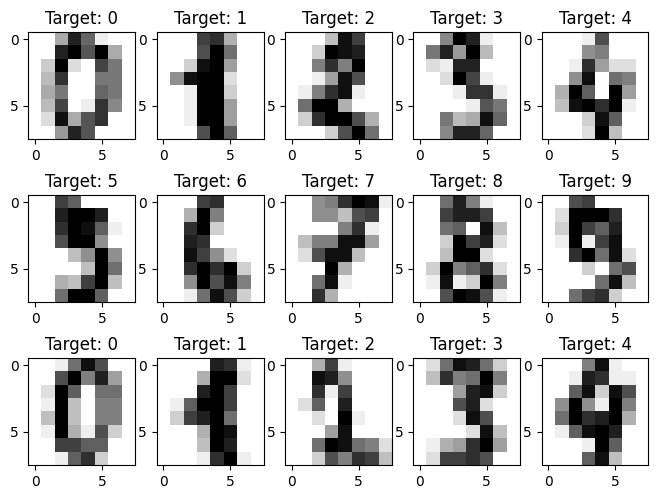

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
data = load_digits()
df = pd.DataFrame(data.data, columns=[f'pixel{i}' for i in range(64)])
df['target'] = data.target

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(8, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap='binary')
    ax.set_title(f'Target: {data.target[i]}')
plt.show()

df.head()

#### **Step #2: Decide independent and dependent variables**

We will be using all features except `target` as our independent variables for predicting `target`. Separate the data into `X` (features) and `y` (target) variables.

In [ ]:
X = data.data
y = data.target

#### **Step #3: Split the data into train and test sets**

In [ ]:
# COMPLETE THIS CODE

#### **Step #4: Import the Logistic Regression algorithm**

In [ ]:
# COMPLETE THIS CODE

#### **Step #5: Initialize the model**

Use the `ovr` multi-class mode.


In [ ]:
clf = LogisticRegression(multi_class=# COMPLETE THIS CODE

#### **Step #6: Fit the model and make predictions for the test data**



In [ ]:
# COMPLETE THIS CODE

y_pred = # COMPLETE THIS CODE

y_pred_proba = # COMPLETE THIS CODE



##### **Prediction Probabilities**

**Run the cells below** to view the prediction probabilities for the first few data points and see how to use them to produce the class predictions as above.

In [ ]:
y_pred_proba = clf.predict_proba(X_test)

print('Probabilities for 0th data point:', y_pred_proba[0])
print('\nProbabilities for 1st data point:', y_pred_proba[1])

Probabilities for 0th data point: [1.85987152e-05 2.26956630e-08 2.41070155e-11 4.52793035e-13
 2.54908135e-09 4.19360160e-06 9.99974591e-01 5.27166549e-09
 1.48772083e-06 1.09817835e-06]

Probabilities for 1st data point: [3.83962548e-06 3.84107009e-12 2.18772515e-12 1.74693824e-09
 2.00828868e-06 2.08261506e-02 2.01136723e-20 5.44346281e-10
 4.45474052e-06 9.79163544e-01]


In [ ]:
import numpy as np
np.argmax(y_pred_proba, axis = 1)

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 8, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 6, 5, 3, 6, 5, 8, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 8, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

#### **Step #7: Evaluate the model**

To more fully understand the quality of this model, evaluate it as follows:

1. Output the confusion matrix.
2. Print the classification report.
3. Print the classification report for a 5NN (or K of your choice) model trained on the same data.
4. Output the ROC curve.


##### **1. Output the confusion matrix.**

In [ ]:
# COMPLETE THIS CODE

##### **2. Print the classification report.**

In [ ]:
report = # COMPLETE THIS CODE
print(report)

##### **3. Print the classification report for a 5NN (or K of your choice) model trained on the same data.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = # COMPLETE THIS CODE
# COMPLETE THIS CODE
knn_pred = # COMPLETE THIS CODE

report = # COMPLETE THIS CODE
print(report)

##### **4. Output the ROC curves.**

**NOTE**: ROC curves are built for *binary* classification, but we have 10 different classes! Since we used the one versus rest (OvR) approach, we can output an ROC curve for each class such that the binary classification represents whether its that class or amongst the rest.

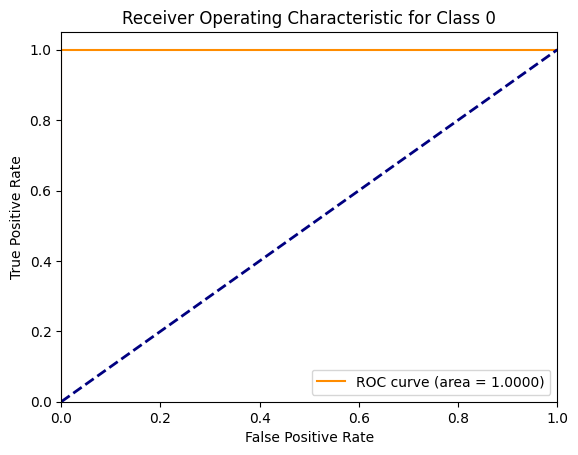

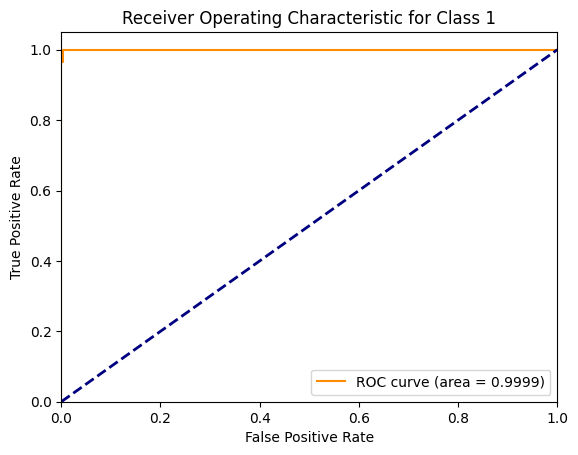

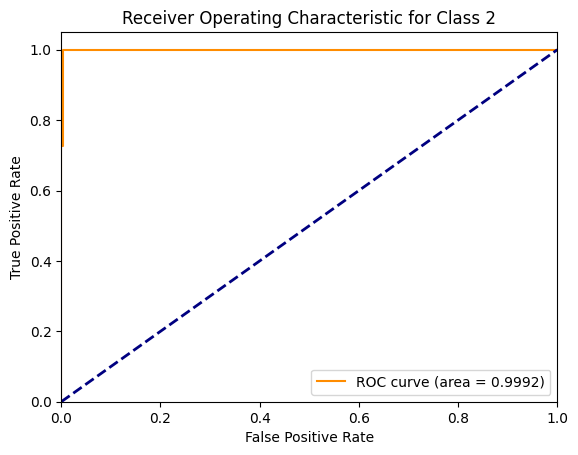

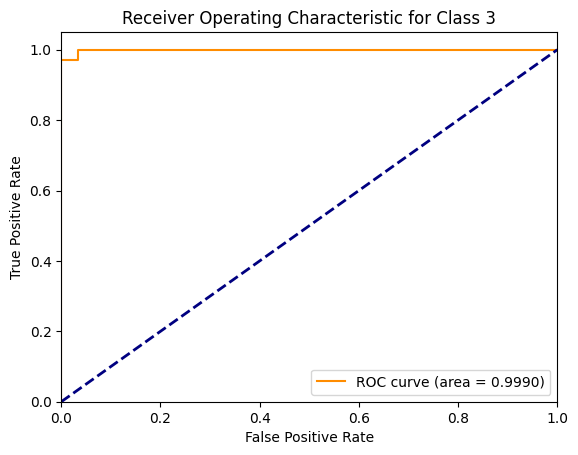

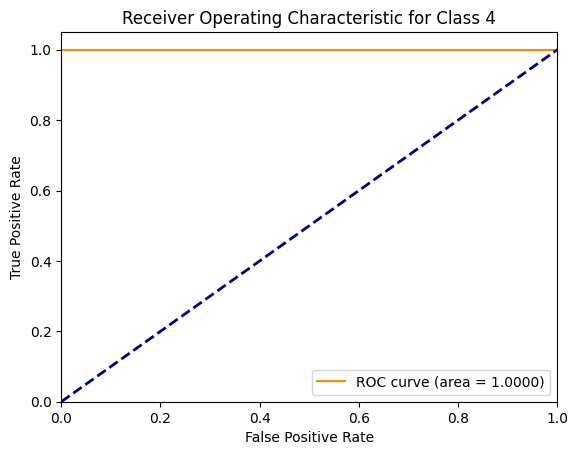

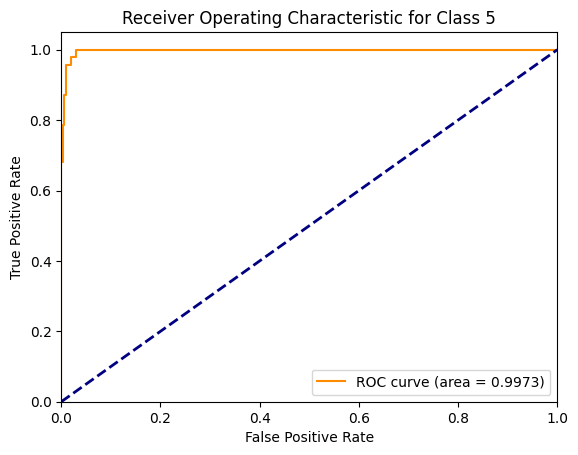

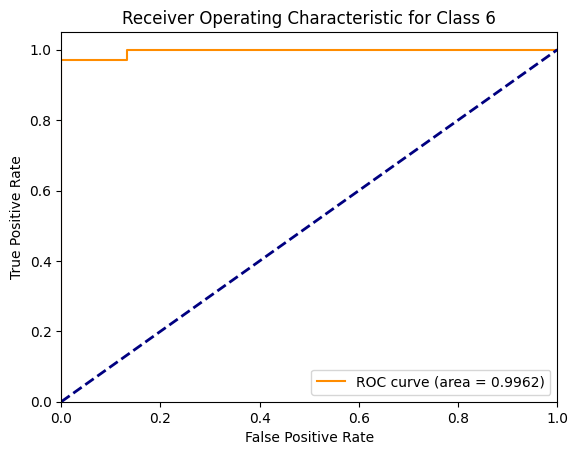

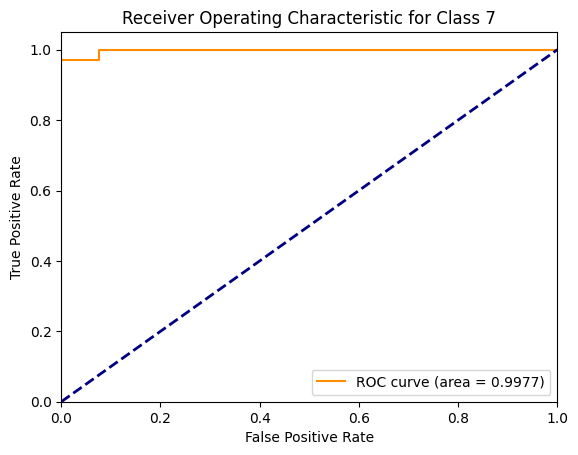

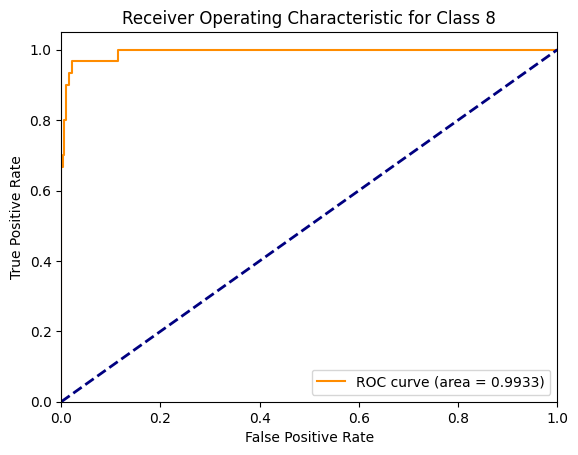

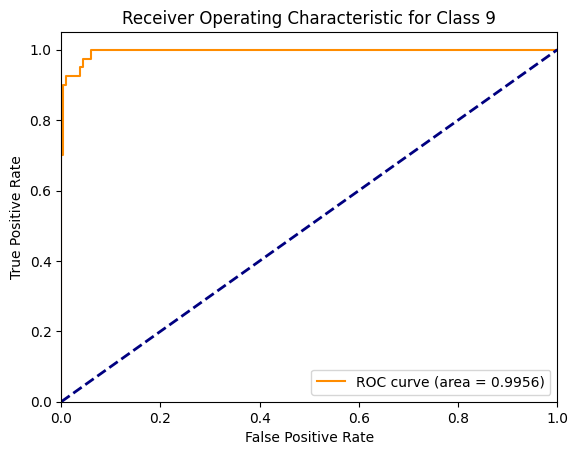

In [ ]:
y_pred_proba = clf.predict_proba(X_test)

# Binarize y_test for ROC curve calculation
from sklearn.preprocessing import label_binarize
y_test_proba = label_binarize(y_test, classes=clf.classes_)
n_classes = y_test_proba.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):

  if len(np.unique(y_test_proba[:, i])) > 1:
    fpr[i], tpr[i], _ = roc_curve(y_test_proba[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_proba[:, i], y_pred_proba[:, i])
  else:
    print(f"Skipping ROC for class {i} due to insufficient data.")


# Plot all ROC curves
for i in range(n_classes):
  if i in roc_auc:
    plt.plot(fpr[i], tpr[i], color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Class ' + str(clf.classes_[i]))
    plt.legend(loc="lower right")
    plt.show()

### **Reflection question**
Answer the following question: Based on the confusion matrix, which number was most frequently mistaken for other numbers?

<a name="p3"></a>

---

## **Part 3: [OPTIONAL] Homework Practice**

---

<a name="p3.1"></a>

---
### **Part 3.1: College Admissions Dataset**
---

#### **About the Dataset**
We've already explored this dataset; now it's time to create a logistic regression model using it! The college admissions dataset contains information on various factors that could influence admission decisions. The dataset includes attributes such as admission status (admit), Graduate Record Examination (GRE) score, Grade Point Average (GPA), socioeconomic status (SES), gender (Gender_Male), race, and undergraduate rank (rank). These features provide insights into the characteristics of applicants and their likelihood of being admitted to a college or university.

The features are as follows:

* `admit`: A binary indicator of whether the student was admitted or not (0: no, 1: yes)
* `gre`: Score obtained on the Graduate Record Examination (ranging from 200-800)
* `gpa`: Grade point average (out of 4.00)
* `ses`: Socioeconomic status (1: low, 2: medium, 3: high)
* `Gender_Male`: A binary indicator of whether the student is male or female (0: female, 1: male)
* `Race`: The race or ethnicity of applicants, which can be categorized into different groups (1: Hispanic, 2: Asian, 3: African American)
* `rank`: The rank or prestige level of applicants' undergraduate institutions, often represented as ordinal values (e.g., 1 = Highest rank, 4 = Lowest rank).


<br>

#### **Your Task**
Using the College Admissions dataset, we will do the following:
* Create a logistic regression model that can predict whether or not a student will be admitted into college


#### **Step #1: Load the data**

Use the following code to load the college admissions dataset.

In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/college_admissions/Admission.xlsx"
admissions_df = pd.read_excel(url)
admissions_df.head()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4


#### **Step #2: Decide independent and dependent variables**

We are going to use `gre` and `gpa` as our independent variables for predicting `admit`. Look at the first 5 rows of data for these features and this label.

In [ ]:
# COMPLETE THIS CODE

#### **Step #3: Split the data into train and test sets**

In [ ]:
# COMPLETE THIS CODE

#### **Step #4: Import the Logistic Regression algorithm**

In [ ]:
# COMPLETE THIS CODE

#### **Step #5: Initialize the model**


In [ ]:
# COMPLETE THIS CODE

#### **Step #6: Fit your model and make predictions for the test data**

In [ ]:
# COMPLETE THIS CODE

y_pred = # COMPLETE THIS CODE

y_pred_proba = # COMPLETE THIS CODE

y_pred_binary = # COMPLETE THIS CODE

#### **Step #7: Evaluate the model**

To more fully understand the quality of this model, evaluate it as follows:

1. Output the confusion matrix.
2. Print the classification report.
3. Print the classification report for a 5NN (or K of your choice) model trained on the same data.
4. Output the ROC curve.


##### **1. Output the confusion matrix.**

In [ ]:
# COMPLETE THIS CODE

##### **2. Print the classification report.**

In [ ]:
report = # COMPLETE THIS CODE
print(report)

##### **3. Print the classification report for a 5NN (or K of your choice) model trained on the same data.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = # COMPLETE THIS CODE
# COMPLETE THIS CODE
knn_pred = # COMPLETE THIS CODE

report = # COMPLETE THIS CODE
print(report)

##### **4. Output the ROC curve.**

In [ ]:
# COMPLETE THIS CODE

#### **Step #8: Use the model**

Using the model we created, predict whether or not the following two students will be admitted into college:

* **Student 1:** `gre` is 670 and `gpa` is 3.74

* **Student 2:**  `gre` is 780 and `gpa` is 3.92

<br>


**NOTE**: you must create a dataframe containing with the information of the new students:

```python
new_student_data = pd.DataFrame(new_student_data_here, columns = ["gre", "gpa"])
```

In [ ]:
# COMPLETE THIS CODE

<a name="p3.2"></a>

---
### **Part 3.2: Water Quality Dataset**
---

#### **About the Dataset**
Access to clean drinking water is essential for health and a basic human right, and yet nearly 2 billion people around the world do not have access to clean drinking water. In some regions it has been shown that investments in water supply and sanitation can result in a net economic benefit because reductions in health care costs and adverse health effects outweigh the costs of providing interventions.

The features are as follows:
* `Hardness`: capacity of water to precipitate soap in (mg/L)
* `Solids`: total dissolved solids (in ppm)
* `Chloramines`: amount of chloramines (in ppm)
* `Conductivity`: electrical conductivity of the water (in μS/cm)
* `Organic_carbon`: amount of organic carbon in ppm
* `Trihalomethanes`: amount of trihalomethanes (in μg/L)
* `Turbidity`: measure of light emitting property of water (in NTU)
* `Potability`: whether or not the water is safe for human consumption (0: no, 1: yes)

<br>

#### **Your Task**
Using the water quality dataset, we will do the following:
* Create a logistic regression model that can predict whether or not water is safe for drinking

#### **Step #1: Load the data**

Use the following code to load the drinking water dataset.

In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/drinking_water/drinking_water_cleaned.csv"
df = pd.read_csv(url).drop("Unnamed: 0", axis=1)
df.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


#### **Step #2: Decide independent and dependent variables**

We are going to use all features except `Potability` as our independent variables for predicting `Potability`.

In [ ]:
# COMPLETE THIS CODE

#### **Step #3: Split the data into train and test sets**

In [ ]:
# COMPLETE THIS CODE

#### **Step #4: Import the Logistic Regression algorithm**


In [ ]:
# COMPLETE THIS CODE

#### **Step #5: Initialize the model**

In [ ]:
# COMPLETE THIS CODE

#### **Step #6: Fit your model and make predictions for the test data**

In [ ]:
# COMPLETE THIS CODE

#### **Step #7: Evaluate the model**

To more fully understand the quality of this model, evaluate it as follows:

1. Output the confusion matrix.
2. Print the classification report.
3. Print the classification report for a 5NN (or K of your choice) model trained on the same data.
4. Output the ROC curve.


##### **1. Output the confusion matrix.**

In [ ]:
# COMPLETE THIS CODE

##### **2. Print the classification report.**

In [ ]:
report = # COMPLETE THIS CODE
print(report)

##### **3. Print the classification report for a 5NN (or K of your choice) model trained on the same data.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = # COMPLETE THIS CODE
# COMPLETE THIS CODE
knn_pred = # COMPLETE THIS CODE

report = # COMPLETE THIS CODE
print(report)

##### **4. Output the ROC curve.**

In [ ]:
# COMPLETE THIS CODE

<a name="p3.3"></a>

---
### **Part 3.3: Zoo Animal Dataset Revisited**
---

#### **About the Dataset**
The following dataset contains information on various zoo animals, including their characteristics and classifications. Our goal is to build a model that predicts the classification of an animal based on its features.

<br>

The labels you will be trying to predict are as follows:

* `1` -- **Mammals** (41 animals in this category): aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, cat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf.
* `2` -- **Birds** (20 animals in this category): chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren.
* `3` -- **Reptiles** (5 animals in this category): pitviper, seasnake, slowworm, tortoise, tuatara.
* `4` -- **Fish** (13 animals in this category): bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna.
* `5` -- **Amphibians** (4 animals in this category): frog, frog, newt, toad.
* `6` -- **Insects** (8 animals in this category): flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp.
* `7` -- **Invertebrates** (10 animals in this category): clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm.

<br>

The features are as follows (all features marked with an * is 1 if yes and 0 if no):


* `animal_name`: Name of the animal
* `hair`: Hair presence*
* `feathers`: Feather presence*
* `eggs`: Egg-laying ability*
* `milk`: Milk production ability*
* `airborne`: Ability to fly*
* `aquatic`: Ability to live in water*
* `predator`: Predatory behavior*
* `toothed`: Teeth presence*
* `backbone`: Backbone presence*
*  `breathes`: Ability to breathe*
* `venomous`: Venom presence*
* `fins`: Fin presence*
* `legs`: Number of legs (0, 2, 4, 5, 6, or 8)
* `tail`: Tail presence*
* `domestic`: Domestication status*
* `catsize`: Cat-like size*
* `class_type`: Numeric class identifier (1-7) as described above

#### **Step #1: Load the data**

Use the following code to load the zoo animal classification dataset.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"

# Create dataframe
column_names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
animals_df = pd.read_csv(url, names=column_names)
animals_df['class_type'] = animals_df['class_type'].map({1: 'mammal', 2: 'bird', 3: 'reptile', 4: 'fish', 5: 'amphibian', 6: 'insect', 7: 'invertebrate'})
animals_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


#### **Step #2: Decide independent and dependent variables**

Your goal is to predict `class_type` using all possible *numerical* features.


In [ ]:
features = # COMPLETE THIS CODE
label = # COMPLETE THIS CODE

#### **Step #3: Split data into training and testing data**

In [ ]:
X_train, X_test, y_train, y_test = # COMPLETE THIS CODE

#### **Step #4: Import the Logistic Regression algorithm**

In [ ]:
# COMPLETE THIS CODE

#### **Step #5: Initialize the model**

Use the `ovr` multi-class mode.


In [ ]:
clf = LogisticRegression(multi_class=# COMPLETE THIS CODE

#### **Step #6: Fit the model and make predictions for the test data**



In [ ]:
# COMPLETE THIS CODE

y_pred = # COMPLETE THIS CODE

y_pred_proba = # COMPLETE THIS CODE



##### **Prediction Probabilities**

**Run the cells below** to view the prediction probabilities for the first few data points and see how to use them to produce the class predictions as above.

In [ ]:
y_pred_proba = clf.predict_proba(X_test)

print('Probabilities for 0th data point:', y_pred_proba[0])
print('\nProbabilities for 1st data point:', y_pred_proba[1])

Probabilities for 0th data point: [0.01145669 0.02077251 0.00905206 0.00444693 0.00950734 0.90801697
 0.03674749]

Probabilities for 1st data point: [0.01290522 0.01380011 0.00102928 0.01215805 0.0062623  0.92977117
 0.02407387]


In [ ]:
import numpy as np
np.argmax(y_pred_proba, axis = 1)

array([5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 2, 3, 3, 1, 4, 5, 5, 1, 2, 5, 2])

#### **Step #7: Evaluate the model**

To more fully understand the quality of this model, evaluate it as follows:

1. Output the confusion matrix.
2. Print the classification report.
3. Print the classification report for a 5NN (or K of your choice) model trained on the same data.
4. Output the ROC curve.


##### **1. Output the confusion matrix.**

**NOTE**: We've added a line of code to rotate the xticks (the class labels on the x axis) so that they don't overlap.

In [ ]:
# COMPLETE THIS CODE

plt.xticks(rotation=45)
plt.show()

##### **2. Print the classification report.**

**NOTE**: Particularly in multi-class classification, you can run into cases where the test set just happens to not include *all* possible classes. This can cause the classification report to throw an error. If this happens, you can include the parameter `labels=clf.classes_` to ensure that the classification report knows all possible classes regardless of what's in the test set.

In [ ]:
report = # COMPLETE THIS CODE
print(report)

##### **3. Print the classification report for a 5NN (or K of your choice) model trained on the same data.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = # COMPLETE THIS CODE
# COMPLETE THIS CODE
knn_pred = # COMPLETE THIS CODE

report = # COMPLETE THIS CODE
print(report)

##### **4. Output the ROC curves.**

**NOTE**: You will need to use the code we used for digit classification here since there are more than 2 classes.

Skipping ROC for class 0 due to insufficient data.


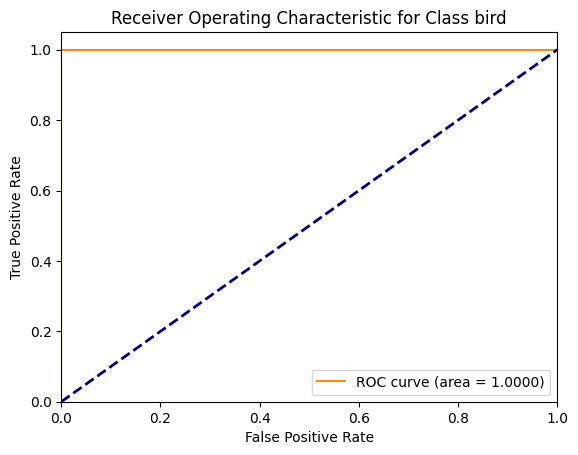

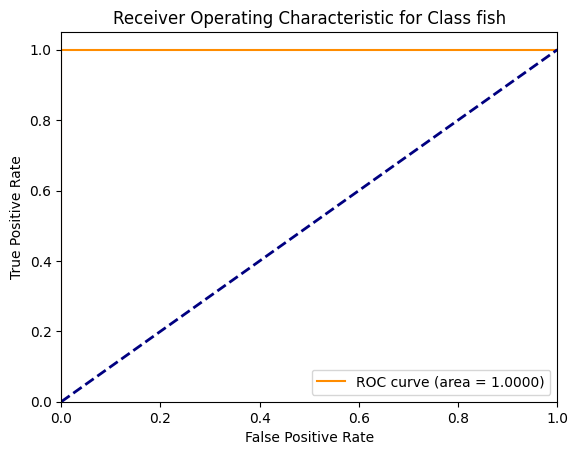

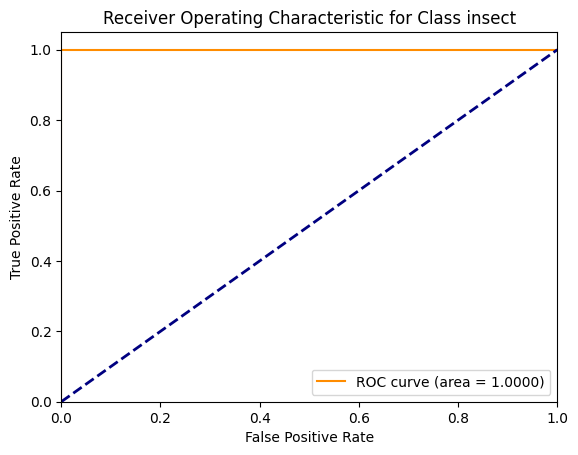

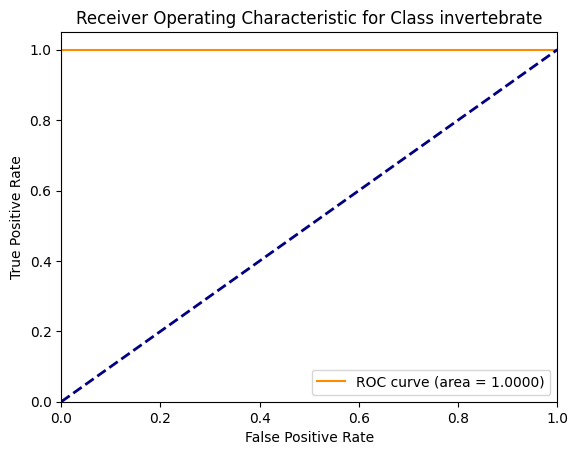

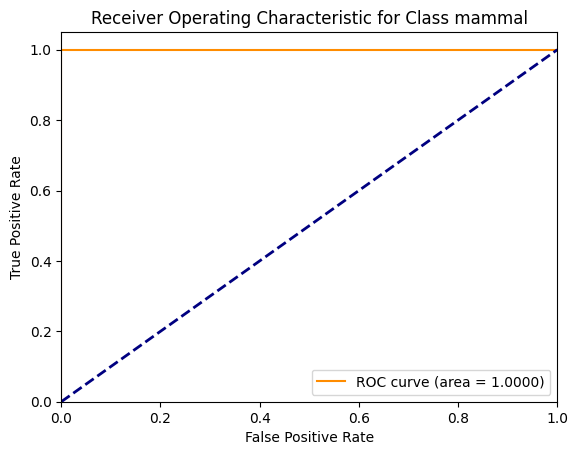

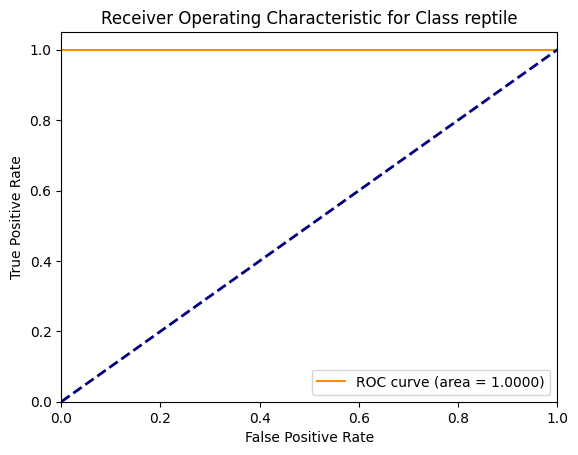

In [ ]:
y_pred_proba = clf.predict_proba(X_test)

# Binarize y_test for ROC curve calculation
from sklearn.preprocessing import label_binarize
y_test_proba = label_binarize(y_test, classes=clf.classes_)
n_classes = y_test_proba.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):

  if len(np.unique(y_test_proba[:, i])) > 1:
    fpr[i], tpr[i], _ = roc_curve(y_test_proba[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_proba[:, i], y_pred_proba[:, i])
  else:
    print(f"Skipping ROC for class {i} due to insufficient data.")


# Plot all ROC curves
for i in range(n_classes):
  if i in roc_auc:
    plt.plot(fpr[i], tpr[i], color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Class ' + str(clf.classes_[i]))
    plt.legend(loc="lower right")
    plt.show()

---
#End of Notebook

© 2024 The Coding School, All rights reserved